In [3]:
pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /private/var/folders/nb/xy9w21d14v727rff20bhslp00000gn/T/pip-req-build-zgphc4mk
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7634 sha256=d04aecfe3985bd4a924ba021e2ffb787606180abae9b2ca5d6837362b14afcbb
  Stored in directory: /private/var/folders/nb/xy9w21d14v727rff20bhslp00000gn/T/pip-ephem-wheel-cache-s6pstmu_/wheels/0d/b3/29/bfe3deffda68980088d17b81331be6667e837ffb4a071bae82
Successfully built preprocess-kgptalkie
  Attempting uninstall: preprocess-kgptalkie
    Found existing installation: preprocess-kgptalkie 0.1.3
    Uninstalling preprocess-kgptalkie-0.1.3:
      Successfully uninstalled preprocess-kgptalkie-0.1.3
Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
import preprocess_kgptalkie as ps
import spacy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Dropout
from tensorflow.keras.layers import Conv1D, MaxPool1D, GlobalMaxPooling1D, MaxPooling1D

In [4]:
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/hate_speech_dataset/master/data.csv', index_col = 0)
df.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [6]:
df['class'].value_counts() #Unbalanced datasets

1    19190
2     4163
0     1430
Name: class, dtype: int64

In [7]:
total = df['class'].value_counts()
index = list(total.index)
count = min(total)

In [8]:
df_bal = pd.DataFrame()
for i in index:
  temp = df[df['class'] == i].sample(count)
  df_bal = df_bal.append(temp, ignore_index= True)

In [9]:
df = df_bal.copy()

In [10]:
df['class'].value_counts() #Balanced Dataset

0    1430
1    1430
2    1430
Name: class, dtype: int64

In [11]:
def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_rt(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x

In [12]:
df['tweet'] = df['tweet'].apply(lambda x: get_clean(x))

In [13]:
df.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,3,0,1,your bitch wants to go to little italy with me...
1,3,0,3,0,1,haifuckedyogirl eat her pussy nd look at her l...
2,3,0,3,0,1,hoskinsty96 saambrowning and retarded
3,3,0,3,0,1,retweet independentt why do these hoes think i...
4,3,1,2,0,1,retweet a2dao when dykes surround you


In [14]:
# Text Tokenization

In [15]:
text = df['tweet'].tolist()

In [16]:
text[:2]

['your bitch wants to go to little italy with me tonight told her no fuck a thot',
 'haifuckedyogirl eat her pussy nd look at her like this kellienehls']

In [17]:
token = Tokenizer()
token.fit_on_texts(text)

In [18]:
len(token.word_counts)

11817

In [19]:
print(token.index_word)

{1: 'a', 2: 'i', 3: 'the', 4: 'retweet', 5: 'you', 6: 'to', 7: 'is', 8: 'bitch', 9: 'and', 10: 'not', 11: 'my', 12: 'that', 13: 'in', 14: 'of', 15: 'it', 16: 'like', 17: 'on', 18: 'be', 19: 'for', 20: 'trash', 21: 'do', 22: 'me', 23: 'am', 24: 'this', 25: 'your', 26: 'ass', 27: 'are', 28: 'out', 29: 'with', 30: 'so', 31: 'they', 32: 'all', 33: 'bitches', 34: 'just', 35: 'but', 36: 'fuck', 37: 'up', 38: 'hoes', 39: 'he', 40: 'have', 41: 'if', 42: 'nigga', 43: 'was', 44: 'at', 45: 'faggot', 46: 'get', 47: 'pussy', 48: 'no', 49: 'hoe', 50: 'when', 51: 'what', 52: 'these', 53: 'loud', 54: 'laughing', 55: 'about', 56: 'white', 57: 'fucking', 58: 'got', 59: 'off', 60: 'shit', 61: 'she', 62: 'will', 63: 'as', 64: 'can', 65: 'we', 66: 'her', 67: 'his', 68: 'youre', 69: 'who', 70: 'one', 71: 'or', 72: 'niggas', 73: 'would', 74: 'know', 75: 'them', 76: 'how', 77: 'some', 78: 'people', 79: 'nigger', 80: 'yankees', 81: 'from', 82: 'now', 83: 'go', 84: 'bird', 85: 'love', 86: 'man', 87: 'want', 88:

In [20]:
vocab_size = len(token.word_counts) + 1

In [21]:
encoded_text = token.texts_to_sequences(text)

In [22]:
print(encoded_text)

[[25, 8, 428, 6, 83, 6, 138, 2294, 29, 22, 257, 332, 66, 48, 36, 1, 1661], [3790, 222, 66, 47, 650, 92, 44, 66, 16, 24, 3791], [2295, 3792, 9, 154], [4, 3793, 105, 21, 52, 38, 108, 15, 7, 240, 6, 169, 651, 1080, 1662, 3794], [4, 1663, 50, 652, 3795, 5], [303, 12, 1081, 216, 17, 25, 2296, 2, 146, 15, 8, 2297, 101, 11, 26, 59], [99, 49, 62, 46, 2298], [1297, 60, 54, 28, 53, 4, 3796, 7, 1298, 19, 22, 13, 1, 3797, 3, 121, 184, 14, 467, 468, 19, 47, 247, 54, 28, 53, 2299, 21, 10], [4, 3798, 3799, 803, 1664, 27, 240, 35, 77, 18, 258, 605, 132, 1, 8], [533, 2300, 1080, 11, 228, 3800, 3801, 2301, 54, 28, 3802, 85, 128, 77, 1080, 166, 11, 122, 54, 28, 53], [76, 93, 3803, 71, 133, 2302, 12, 8, 26, 42, 7, 1665, 11, 3804], [3805, 4, 3806, 716, 2, 155, 3807, 913, 2, 3808, 25, 8], [4, 3809, 2, 21, 10, 429, 55, 33, 38, 18, 170, 15, 29, 31, 159, 606], [3810, 315, 105, 3811, 55, 3812, 100, 83, 120, 316, 9, 3813, 19, 1, 274, 6, 266, 25, 47, 37, 106, 430, 44, 607], [147, 11, 187, 3814, 34, 1082, 37, 6, 1

In [23]:
max_length = 120
X = pad_sequences(encoded_text, maxlen=max_length, padding = 'post')

In [24]:
print(X)

[[   25     8   428 ...     0     0     0]
 [ 3790   222    66 ...     0     0     0]
 [ 2295  3792     9 ...     0     0     0]
 ...
 [   68    32   141 ...     0     0     0]
 [    4 11815   303 ...     0     0     0]
 [   13   149   174 ...     0     0     0]]


In [25]:
X.shape

(4290, 120)

Model Building

In [27]:
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam

In [28]:
y = df['class']

In [29]:
y

0       1
1       1
2       1
3       1
4       1
       ..
4285    0
4286    0
4287    0
4288    0
4289    0
Name: class, Length: 4290, dtype: int64

In [30]:
y = np_utils.to_categorical(df['class'])

In [31]:
print(y)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [33]:
X_train.shape, X_test.shape

((3432, 120), (858, 120))

In [34]:
vec_size = 300
model = Sequential()
model.add(Embedding(vocab_size, vec_size, input_length=max_length))

model.add(Conv1D(32, 2, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(3, activation='softmax'))

In [35]:
model.compile(optimizer=Adam(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 2, validation_data=(X_test, y_test), shuffle = True)

Epoch 1/2
108/108 [==============================] - 8s 62ms/step - loss: 1.0510 - accuracy: 0.4644 - val_loss: 0.6834 - val_accuracy: 0.7914
Epoch 2/2
108/108 [==============================] - 6s 58ms/step - loss: 0.5921 - accuracy: 0.7952 - val_loss: 0.4718 - val_accuracy: 0.8263


Model Testing

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [38]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

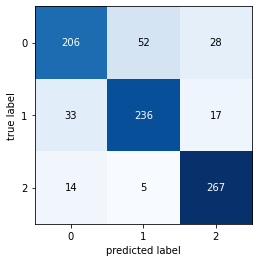

In [39]:
plot_confusion_matrix(confusion_matrix(np.argmax(y_test, axis=-1), y_pred))

In [40]:
print(classification_report(np.argmax(y_test, axis=-1), y_pred))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76       286
           1       0.81      0.83      0.82       286
           2       0.86      0.93      0.89       286

    accuracy                           0.83       858
   macro avg       0.83      0.83      0.82       858
weighted avg       0.83      0.83      0.82       858



In [41]:
x = 'hey bitch whass up'

In [42]:
def get_encoded(x):
  x = get_clean(x)
  x = token.texts_to_sequences([x])
  x = pad_sequences(x, maxlen=max_length, padding = 'post')
  return x

In [43]:
get_encoded(x)

array([[269,   8,  37,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0]], dtype=int32)

In [44]:
np.argmax(model.predict(get_encoded(x)), axis=-1)

array([1])

In [45]:
model.save('model_hate_speech.h5',)

In [46]:
import pickle

In [47]:
pickle.dump(token, open('token.pkl', 'wb'))